# Classification Codealong and Journey Ahead

In this session we will be understanding classification Machine Learning pipeline as well as we will be understanding the expectations going ahead.

Following is the entire flow of an end to end Machine Learning solution:

<img src="image/ML_flow.png"/>


In the coming mentor sessions we will be understanding each of the aspect separately

## Forming a Business problem

**A business problem is presented to you. As a data scientist, you must be able to formulate a data science problem that you would be ready to solve.**

You must have or soon will come up with this question of, how a data science problem is identified?
This itself is a process of its own and is a very important aspect as the top notch players of the organization are involved. As a Data Science team is solving a problem for the future so the stakes are very high here.

Whenever you see a problem statement, try to understand the reason for the problem statement being taken up.

**We will have sessions discussing the same in the Sunday sessions**

We have a problem statement given below and similarly will be provided for all the Saturday code along sessions.


### Census Income Dataset

### Problem Statement :
The dataset given below contains the census information about the attributes of individuals as the features and their income as the target. The task is to predict whether a person makes over $50K a year or not.

## About the dataset:
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics).  

The data has 1032 instances and 15 features. For your information the target variable `Income` has already been label encoded.
1 indicates the income is greater than or equal to 50K. 0 indicates the income is less than 50K. Below is a brief about the features in the dataset.

|Features|Description|
|-----|-----|
|age|Age of the person|
|Workclass|Categorical variable having 8 categories each denoting the type of employment|
|fnlwgt|final weight. |
|education|Categorical variable with 16 categories each denoting the qualification of the person.|
|education-num|number of years of education|
|marital-status|Categorical variable with 7 categories|
|occupation|Categorical variable with 14 categories each denoting the type of occupation of the individual|
|relationship|Categorical variable with 6 categories.|
|race|Categorical variable with 5 categories each denoting the ethnicity of the individual|
|sex|Gender of the person|
|capital-gain|Continuous| 
|capital-loss|Continuous|
|hours-per-week|Working hours per week|
|native-country|Categorical|
|Income|Target variable. 1 indicates >=50k. 0 indicates <50K|



## Data Cleaning and EDA

**The next stage is to collect and prepare the data required to solve the data science problem. And a data scientist spends about 60-70% of his time at this stage.**


We will be conducting 2 to 3 code alongs every month involving Data cleaning and EDA as this plays a very important part to create a successful ML model.

* Expectations :

    - Understand the problem solving approach of the mentor
    - Understanding the logic of the code
    - Get familiar with the syntax of the code
    - Clear your queries if any regarding the content

    
*Note : Non programmers need 8-10 hours of effort to get used to the basics of EDA initially (Programmers need 4-6 hours)*

### Reading the data using pandas module.

In [74]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
%matplotlib inline

In [7]:
df = pd.read_csv('./data/adult_preprocessed.csv',index_col=0)

In [8]:
df.head()

,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


### Check for null values and get a summary of all the columns in the dataset

In [9]:
df.isnull().sum()

age               0
Workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

### For further analysis split to bring all the continuous variables together and categorical variables together.

In [13]:
num_cols=df.select_dtypes(include=np.number).columns

In [14]:
cat_cols=df.select_dtypes(exclude=np.number).columns

In [16]:
print(num_cols)
print('-'*100)
print(cat_cols)

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'Income'],
      dtype='object')
----------------------------------------------------------------------------------------------------
Index(['Workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')


In [18]:
df[cat_cols]

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
1114,Private,HS-grad,Divorced,Handlers-cleaners,Own-child,White,Female,United-States
1116,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
1117,Private,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,United-States
1118,Local-gov,Bachelors,Married-civ-spouse,Prof-specialty,Wife,White,Female,United-States


In [26]:
df.groupby('education')['Income'].value_counts()

education      Income
 10th          0          18
               1           1
 11th          0          38
               1           1
 12th          0           7
               1           2
 1st-4th       0           4
 5th-6th       0          10
 7th-8th       0          11
               1           3
 9th           0          16
 Assoc-acdm    0          28
               1           9
 Assoc-voc     0          36
               1          14
 Bachelors     0         105
               1          79
 Doctorate     1          14
               0           3
 HS-grad       0         281
               1          57
 Masters       0          29
               1          27
 Preschool     0           2
 Prof-school   1          11
               0           1
 Some-college  0         189
               1          36
Name: Income, dtype: int64

In [27]:
df.groupby('education')['Income'].value_counts().unstack()

Income,0,1
education,,
10th,18.0,1.0
11th,38.0,1.0
12th,7.0,2.0
1st-4th,4.0,NaN
5th-6th,10.0,NaN
7th-8th,11.0,3.0
9th,16.0,NaN
Assoc-acdm,28.0,9.0
Assoc-voc,36.0,14.0


###  Plotting a stacked bar chart, have an estimate of the number of people with income above and below 50K with respect to each of the categorical features

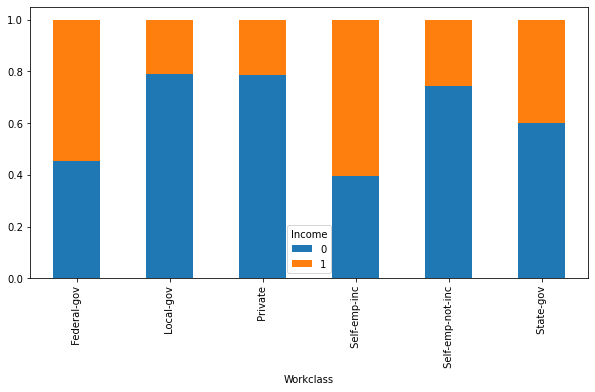

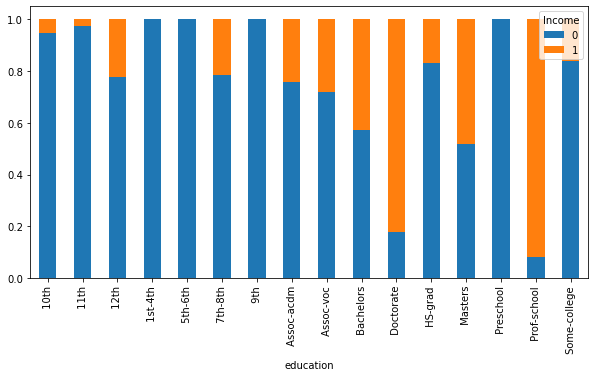

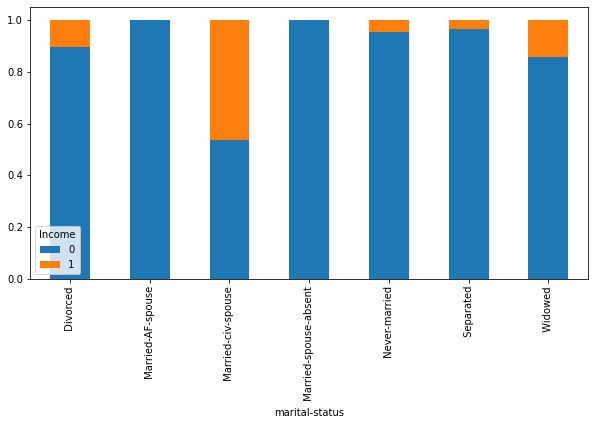

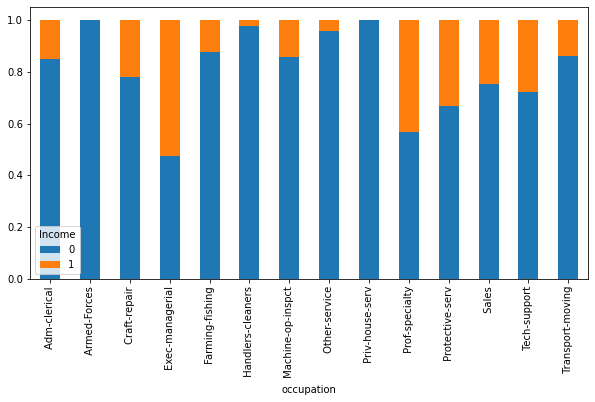

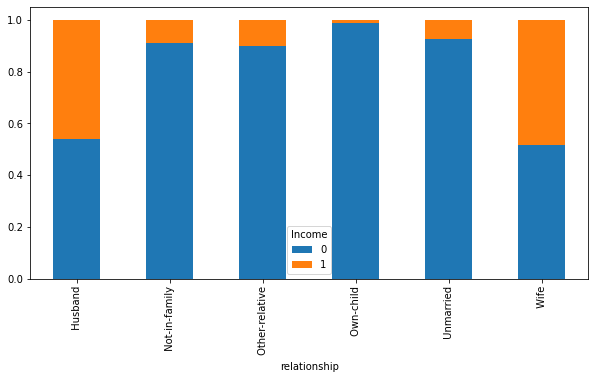

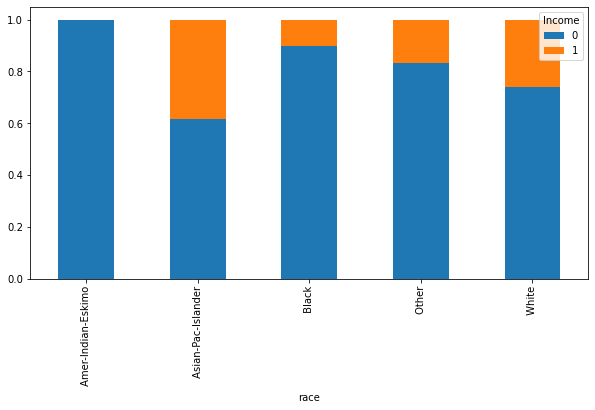

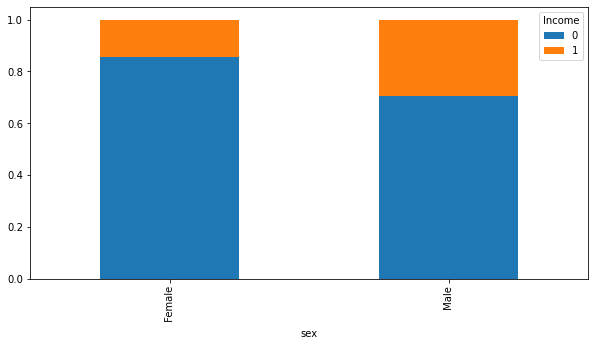

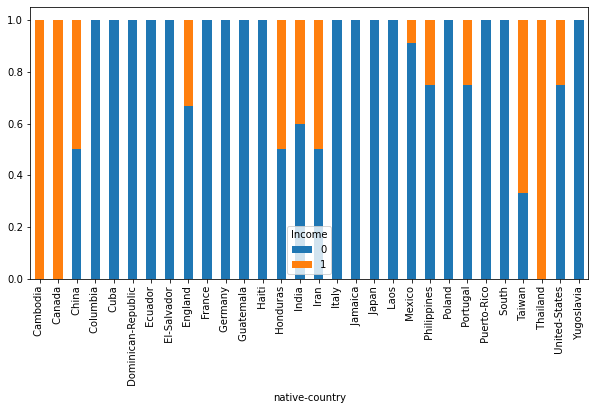

In [29]:
for i in df[cat_cols]:
    df.groupby(i)['Income'].value_counts(normalize=True).unstack().plot(kind='bar',stacked=True,figsize=(10,5))
    

In [34]:
df.groupby('native-country')['Income'].count()

native-country
 Cambodia                1
 Canada                  3
 China                   2
 Columbia                1
 Cuba                    4
 Dominican-Republic      2
 Ecuador                 1
 El-Salvador             2
 England                 3
 France                  1
 Germany                 4
 Guatemala               2
 Haiti                   2
 Honduras                2
 India                   5
 Iran                    4
 Italy                   1
 Jamaica                 2
 Japan                   2
 Laos                    1
 Mexico                 23
 Philippines             4
 Poland                  3
 Portugal                4
 Puerto-Rico             4
 South                   1
 Taiwan                  3
 Thailand                1
 United-States         943
 Yugoslavia              1
Name: Income, dtype: int64

In [41]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia'],
      dtype=object)

In [43]:
df['country_cat']=df['native-country'].map(lambda x: ' North America' if x in [' United State' , ' Canada'] else 'Others')
print(df['country_cat'])

0       Others
1       Others
2       Others
3       Others
4       Others
         ...  
1114    Others
1116    Others
1117    Others
1118    Others
1119    Others
Name: country_cat, Length: 1032, dtype: object


In [48]:
df.groupby(country_cat)['Income'].value_counts(normalize=True).unstack()
plot.legend(loc='center left', bbox_to_anchor=(1.0,0.5))

NameError: name 'country_cat' is not defined

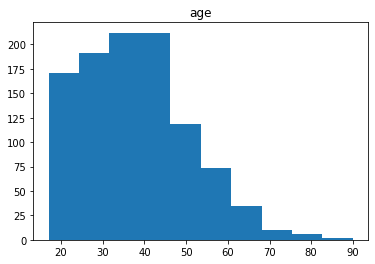

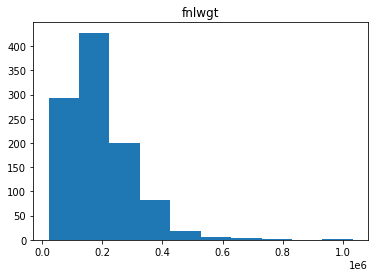

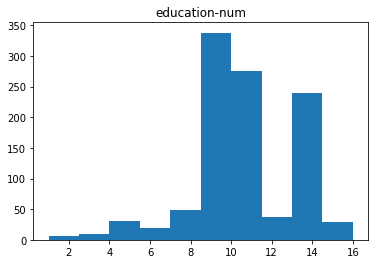

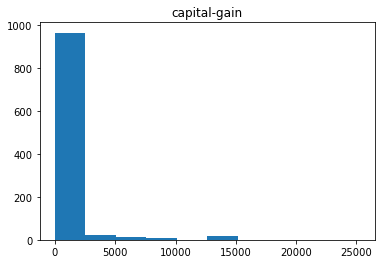

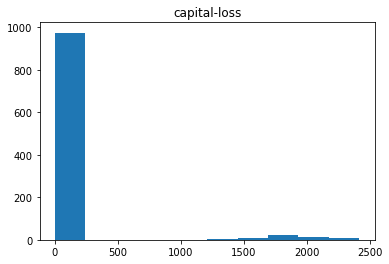

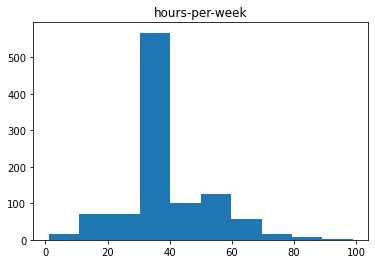

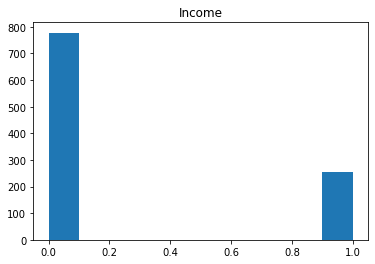

### What can you infer from the above visualisations ?

### Plot a histogram for all the continuous variables to check for skewness

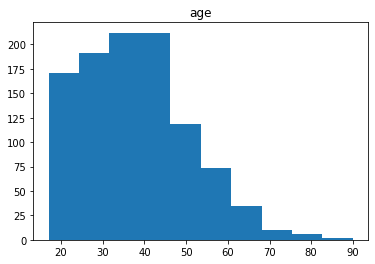

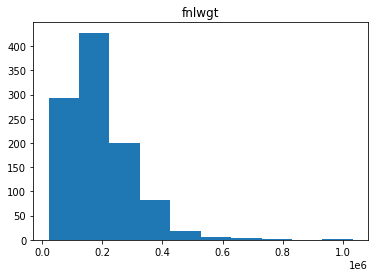

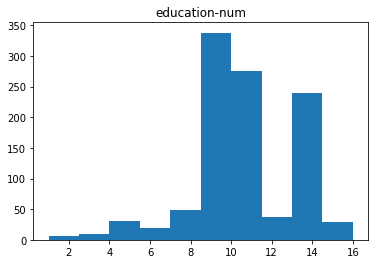

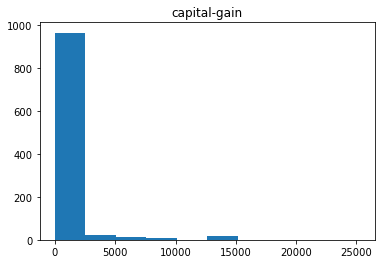

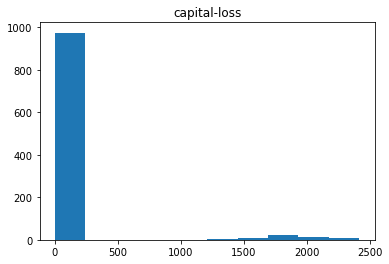

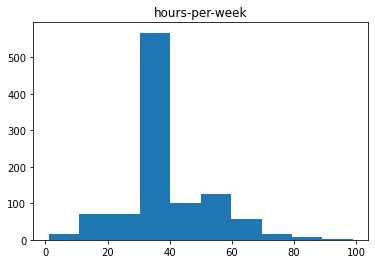

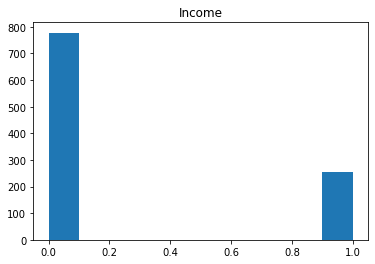

In [52]:
for i in df[num_cols]:
    plt.title(i)
    plt.hist(df[i])
    plt.show()

In [57]:
df['capital-gain'].value_counts(normalize=True)[:3]

KeyError: 'capital-gain'

In [53]:
df['capital-loss'].value_counts(normalize=True)[:3]

0       0.944767
1902    0.009690
1977    0.007752
Name: capital-loss, dtype: float64

In [54]:
df.drop(['capital-gain','capital-loss','native-country'], axis=1, inplace=True)

In [58]:
df

,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,Income,county_cat,country_cat
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,0,Others,Others
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,0,Others,Others
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,0,Others,Others
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,0,Others,Others
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,0,Others,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,34,Private,290763,HS-grad,9,Divorced,Handlers-cleaners,Own-child,White,Female,40,0,Others,Others
1116,36,Private,51100,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,40,0,Others,Others
1117,41,Private,227644,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,50,0,Others,Others
1118,58,Local-gov,205267,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,40,1,Others,Others


### Majority of values in capital-gain and capital-loss are zeros. So remove the columns

In [56]:
df['capital-gain'].value_counts(normalize=True)[:3]

KeyError: 'capital-gain'

In [69]:
num_cols_2= df.select_dtypes(include=np.number).drop('Income', axis=1).columns
print(num_cols_2)

Index(['age', 'fnlwgt', 'education-num', 'hours-per-week'], dtype='object')


### Check for skewness in the continuous data

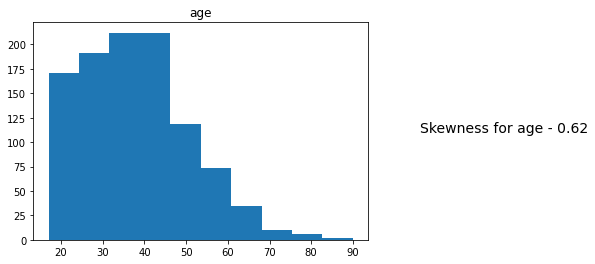

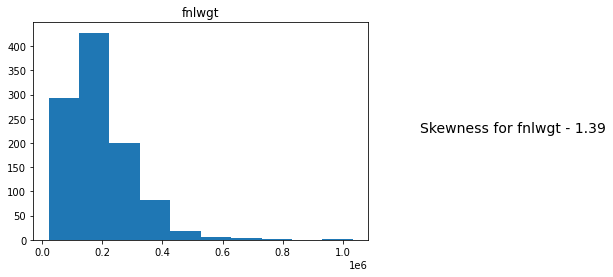

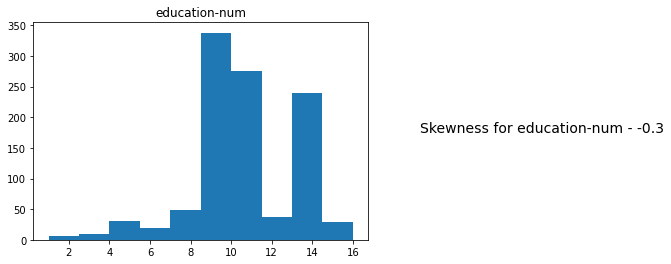

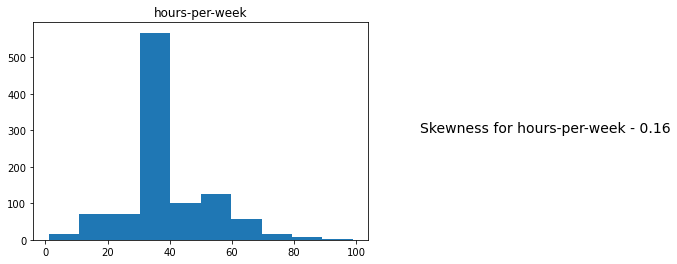

In [70]:
for i in df[num_cols_2]:
    plt.title(i)
    plt.hist(df[i])
    skewness_score = round(skew(df[i]), 2)
    txtstr = f'Skewness for {i} - {skewness_score}'
    plt.gcf().text(1.02, 0.5, txtstr, fontsize=14)
    plt.show()
  
        

### The column `fnlwgt` is a highly right skewed column. Remove the skewness using a log transform and then check if the skewness has been removed by plotting its histogram

(array([ 15.,  36.,  40.,  50., 174., 249., 290., 153.,  22.,   3.]),
 array([2.39430488, 2.42466222, 2.45501955, 2.48537688, 2.51573422,
        2.54609155, 2.57644888, 2.60680622, 2.63716355, 2.66752088,
        2.69787821]),
 <a list of 10 Patch objects>)

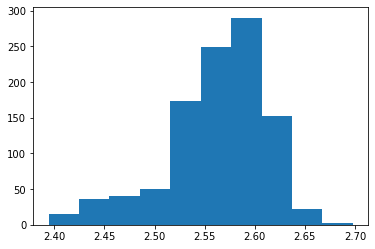

In [72]:
df['fnlwgt'] = np.log1p(df['fnlwgt'])

plt.hist(df['fnlwgt'])

### Check for the pearson correlation between the continuous variables by plotting a heatmap

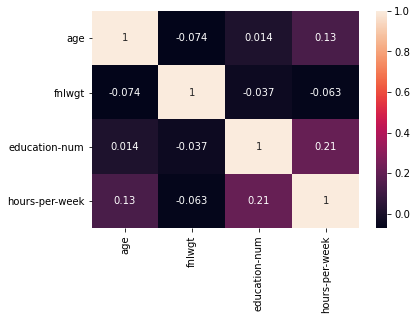

In [75]:
sns.heatmap(df[num_cols_2].corr(), annot=True)

### Label Encode all the categorical variables

In [77]:
cat_cols2=df.select_dtypes(exclude=np.number).columns.values
cat_cols2

array(['Workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'county_cat', 'country_cat'],
      dtype=object)

In [78]:
df_ohe = pd.get_dummies(df,columns=cat_cols2, drop_first=True)
df_ohe

,age,fnlwgt,education-num,hours-per-week,Income,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,...,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,country_cat_Others
0,39,2.506199,13,40,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,1
1,50,2.512064,13,13,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,38,2.586364,9,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1
3,53,2.592726,7,40,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,28,2.619730,13,40,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,34,2.608618,9,40,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1116,36,2.471615,10,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1117,41,2.590433,9,50,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1118,58,2.582644,13,40,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1


### Concatenate both the continuous and categorical dataframes

In [ ]:
# Not needed as data was not in split

### Split into features and target

In [80]:
X = df_ohe.drop('Income', axis=1)
y = df_ohe['Income']

In [81]:
X

,age,fnlwgt,education-num,hours-per-week,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,education_ 11th,...,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,country_cat_Others
0,39,2.506199,13,40,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
1,50,2.512064,13,13,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1
2,38,2.586364,9,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
3,53,2.592726,7,40,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,1
4,28,2.619730,13,40,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,34,2.608618,9,40,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1116,36,2.471615,10,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1117,41,2.590433,9,50,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1118,58,2.582644,13,40,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [84]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1114    0
1116    0
1117    0
1118    1
1119    0
Name: Income, Length: 1032, dtype: int64

### Fit a StandardScaler on the features

In [ ]:
#skip this strep because we are using one hot encoding

### Convert array to a dataframe

In [ ]:
#also skip this

### Split into train and validation data

In [82]:
X_train,X_val,y_train,y_val=train_test_split(X,y,train_size=0.8,random_state=21)

In [83]:
print(X_train.shape)
print(X_val.shape)

(825, 54)
(207, 54)


## Model Building

We train a machine learning model on this data. All the ML algorithms - both supervised and unsupervised learning are used here. The output of this model is then used to figure out the right insights for the business and solve the problem.

There will be 1 -2 sessions every month where in we will be discussing and executing model building

* Expectations :

    - Understand the problem solving approach of the mentor
    - Understanding the parameters of an algorithm
    - Understanding hyperparameter tuning and the logic behind it

*Note : It is okay if you have not aware of a particular algorithm used in the session as the journey being self paced, you can study its basic working after the session and in depth from the platform as and when you arrive at the concept.*

In [85]:
lr=LogisticRegression()

### Fit a logistic regression model

In [86]:
lr.fit(X_train, y_train)

LogisticRegression()

## Model Evaluation

Next, the model is evaluated to find out if the model is giving the right results on unseen data. If the model is found to be unsuitable or not giving satisfactory results, then you go back, play with the hyper-parameters to find the optimum setting and check.

* Expectations :

    - Understand the evaluation metrics
    - Understand whether the result is as expected or can be worked upon

In [87]:
y_pred = lr.predict(X_val)

### Checking the accuracy, f1_score, confusion matrix

In [88]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       152
           1       0.78      0.65      0.71        55

    accuracy                           0.86       207
   macro avg       0.83      0.79      0.81       207
weighted avg       0.86      0.86      0.86       207



### Perform hyperparameter tuning using GridSearch

In [ ]:
params = {'penalty':['l1','l2'],'C':[0.001,0.01,0.1,1,10,100]}
grid_search = GridSearchCV(estimator=lr, param_grid=params,scoring='f1',cv=10)
grid_search.fit(X_train,y_train)
y_pred_grid_search = grid_search.predict(X_val)

### Find the best parameters and the metrics after grid search

In [ ]:
grid_search.best_params_

In [ ]:
print('Accuracy after grid search is {}'.format(accuracy_score(y_valid,y_pred_grid_search)))
print('F1-score after grid search is {}'.format(f1_score(y_valid,y_pred_grid_search)))
print('Confusion Matrix is')
print()
print((confusion_matrix(y_valid,y_pred_grid_search)))

## Reporting

Finally you would have to cut through the technical jargon and convey the key insights to the business. This is an important step where you showcase the solution to the business problem and convey the recommended data-driven decisions to the stakeholder.

**Sessions on this topic will be covered in Sunday sessions in some form or other**